**😰 Stress Detection from Social Media Articles**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import express

import nltk
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,precision_score,recall_score, confusion_matrix,f1_score

from keras.models import Sequential

In [2]:
REDDIT = 'Twitter_Full.csv'
USECOLS = ['text','hashtags', 'labels']

df = pd.read_csv(filepath_or_buffer=REDDIT, sep=';', usecols=USECOLS)
df.head()
df.shape

(8900, 3)

In [3]:
df.sample(10)

,text,hashtags,labels
6869,Out soon.... heart exclamation My Cam edit wor...,"['Excited', 'AseemaDhola', 'CoverSong', 'gunes...",0
1678,This is like the 5th time I have brought peopl...,['tired'],1
4138,TcmRestoShammy & I continue into our adventure...,[],0
279,Do You Spend More Time Trying to Please Others...,"[""'LifeHack'""]",1
8408,Start your day with motivation. Have a safe an...,"['friday_motivation', 'happy', 'weekend', 'ins...",0
604,Exposure to traffic-related AirPollution is as...,"['AirPollution', 'MentalHealth']",1
2915,Duke study shows individuals with a history of...,['trauma'],1
845,"Clear as ""Black & White"" HeartFailure plays ""s...","['HeartFailure', 'Cancer', 'mentalhealth']",1
7506,1 day to go for money heist double exclamation...,"['MoneyHeist', 'MoneyHeistSeason5', 'Netflix',...",0
1501,Rose speaks on the importance of finding your ...,"['MentalHealthMatters', 'traumainformed', 'Men...",1


In [4]:
df['labels'].value_counts()

labels
1    4534
0    4366
Name: count, dtype: int64

In [5]:
#REDDIT = 'Reddit_Combi.csv'
#USECOLS = ['Body_Title', 'label']

#df = pd.read_csv(filepath_or_buffer=REDDIT, sep=';', usecols=USECOLS)
#df.head()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8900 entries, 0 to 8899
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      8897 non-null   object
 1   hashtags  8892 non-null   object
 2   labels    8900 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 208.7+ KB


In [7]:
df.describe()

,labels
count,8900.000000
mean,0.509438
std,0.499939
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
df.shape

(8900, 3)

In [9]:
df['labels'].value_counts()

labels
1    4534
0    4366
Name: count, dtype: int64

In [10]:
df.isnull().sum()

text        3
hashtags    8
labels      0
dtype: int64

In [11]:
df.duplicated().sum()

375

In [12]:
df = df.drop_duplicates()
df

,text,hashtags,labels
0,Being s mom is cleaning 24/7 the same shit ove...,"['momlife', 'kids', 'tired']",1
1,And now we have been given the walkthru book b...,['walkthru'],0
2,Wishing YOU Peace Joy & Love! JoyTrain MentalH...,"['Peace', 'Joy', 'Love', 'JoyTrain', 'MentalHe...",0
3,speak-no-evil monkey Can I Be Honest With You...,"['therapy', 'help', 'NLP', 'CBT', 'hypnotherap...",1
4,Psy Do u hv any regrets? Me No Psy Are you hap...,[],0
...,...,...,...
8895,Thank you for all your business questions toda...,"['business', 'business', 'Stress', 'mind', 'bo...",0
8896,Who is planning on walking their minds today?!...,"[""'walkthemind'"", ""'walking'"", ""'walk'"", ""'hik...",1
8897,no mobile phones Three Tips to Reduce Technos...,"['m1hl', 'stress', 'technostress', 'tips']",1
8898,purple heart Day 1 purple heart But vets firs...,"['DogsofTwittter', 'shout', 'getoutforshout', ...",1


In [13]:
df = df.dropna()
df

,text,hashtags,labels
0,Being s mom is cleaning 24/7 the same shit ove...,"['momlife', 'kids', 'tired']",1
1,And now we have been given the walkthru book b...,['walkthru'],0
2,Wishing YOU Peace Joy & Love! JoyTrain MentalH...,"['Peace', 'Joy', 'Love', 'JoyTrain', 'MentalHe...",0
3,speak-no-evil monkey Can I Be Honest With You...,"['therapy', 'help', 'NLP', 'CBT', 'hypnotherap...",1
4,Psy Do u hv any regrets? Me No Psy Are you hap...,[],0
...,...,...,...
8895,Thank you for all your business questions toda...,"['business', 'business', 'Stress', 'mind', 'bo...",0
8896,Who is planning on walking their minds today?!...,"[""'walkthemind'"", ""'walking'"", ""'walk'"", ""'hik...",1
8897,no mobile phones Three Tips to Reduce Technos...,"['m1hl', 'stress', 'technostress', 'tips']",1
8898,purple heart Day 1 purple heart But vets firs...,"['DogsofTwittter', 'shout', 'getoutforshout', ...",1


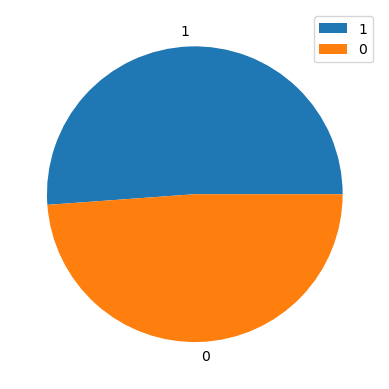

In [14]:
plt.pie(df['labels'].value_counts(),labels=df['labels'].unique())
plt.legend()
plt.show()

In [15]:
df['text'].value_counts()

text
Mental health is hard, but memes can make it easier blue heart Join us on Discord ... mentalhealth health anxiety depression covid mentalhealthmatters love mentalhealthawareness support selfcare wellbeing mindfulness mentalillness recovery discord                            4
How can we break free from our self-destructive habits? Mindfulness for Beginners ep106 listen and share! >>> mentalhealth podcast podcasts spiritual motivation mondaymotivation inspiration anxiety life love yoga happiness lifestyle                                           4
Social Workers and Money We Need to Talk About It -Free webinar September 9th @ 2PM socialwork socialworkers financialsocialwork financialwellnesss financialhealth HOPE stress NASW SocialWorkTwitter                                                                             3
What love is that, that cannot turn two into one? For more info click backhand index pointing right TheAwaitedOne GoharShahi ALRATV YounusAlGohar Happy Smile Cute M

In [16]:
X = df['text']
y = df['labels']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
tfidf_vectorizer = TfidfVectorizer()

In [19]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [20]:
import nltk
from nltk.corpus import stopwords

In [21]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
stop_words = set(stopwords.words('english'))
print('list of stop words:', stop_words)

list of stop words: {"hadn't", "isn't", 'because', 'what', 'their', 'again', 'before', 'where', 'both', 'you', 'll', 'through', "should've", 'own', 'than', 'hadn', 'was', "hasn't", 'them', 'or', 'didn', 'hers', 'am', 'down', 'just', 'weren', 'if', 'your', 'himself', 'the', 'ours', 'should', 'after', "couldn't", 'by', 'were', 'had', 's', 'needn', 'only', 'mustn', 'ma', 'that', "weren't", 'why', 'shan', 'wasn', "don't", 'theirs', 'very', 'then', 'did', 'aren', 'to', 'yourselves', 'our', 'which', 'my', 'd', 'any', 'such', 'can', 'are', 'don', 'being', 'below', "aren't", "won't", 'but', 'whom', "needn't", 'during', 'not', 'each', 'she', 'these', 'of', 'under', 'as', 'his', 'haven', 'herself', 'be', 'into', 'all', 'yourself', 'at', 't', 'for', 'y', 'an', 'from', 'will', 'me', "you've", 'hasn', 'over', 'is', "haven't", 'itself', 'does', 'off', 'against', 'has', 'nor', 'her', "shouldn't", 'up', 'he', 'here', 'out', 'isn', 'him', 'a', 'mightn', 'now', 've', 'so', 'we', 'in', 'between', 're', '

In [23]:
def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            # remove the special chars in review like '"#$@!%^&*()_+-~?>< etc.
            word = ("".join(e for e in words if e.isalnum()))
            # Conver all letters to lower-case
            word = word.lower()
            # stop-word removal
            if not word in stop_words:
                string += word + " "
        df[column][index] = string

In [24]:
nlp_preprocessing

<function __main__.nlp_preprocessing(total_text, index, column)>

In [25]:
import os

In [26]:
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [27]:
combined_text_pos = ' '.join(df[df['labels']==1])
combined_text_neg = ' '.join(df[df['labels']==0])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(combined_text_pos)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(combined_text_neg)

In [28]:
df.sample(10)

,text,hashtags,labels
836,Maxiter94 Day started way too early for me (03...,['tired'],1
3822,Yet DEFRA still killed him! Shame on GeorgeEus...,"[""'DEFRA'"", ""'GeorgeEustice'""]",1
7515,Learn Healthy Tips to Manage Stress in Your Li...,"['sevenedges', 'stressrelief', 'stress', 'anxi...",0
8385,Admire the Beauty around You ..... Mornings su...,"['Amazing', 'beauty', 'nature', 'fun', 'green'...",0
4636,Do literally whatever makes you happy grinning...,"['happiness', 'happy', 'doitfortheprocess']",0
7371,Glad to see mentalhealth prioritized at the hi...,['mentalhealth'],1
6381,that plays every night peersupport mentalhealt...,"[""'peersupport'"", ""'mentalhealth'"", ""'depressi...",1
320,"See new webpage for ""The Orlando File"" goodrea...","['goodread', 'happy', 'goodbook', 'bookclub', ...",0
5739,A neuroscientist shares the 6 exercises she do...,"[""'MentalHealthMatters'""]",1
5421,"Bravo, ! Said a member of senior management, “...","[""'mentalhealth'"", ""'mentalhealthmatters'"", ""'...",1


Removing punctuations

In [29]:
import string

In [30]:
exclude = string.punctuation

In [31]:
def remove_punc(text):
    return text.translate(str.maketrans('','',exclude))

In [32]:
text = df['text']

In [33]:
print(df['text'])

0       Being s mom is cleaning 24/7 the same shit ove...
1       And now we have been given the walkthru book b...
2       Wishing YOU Peace Joy & Love! JoyTrain MentalH...
3        speak-no-evil monkey Can I Be Honest With You...
4       Psy Do u hv any regrets? Me No Psy Are you hap...
                              ...                        
8895    Thank you for all your business questions toda...
8896    Who is planning on walking their minds today?!...
8897     no mobile phones Three Tips to Reduce Technos...
8898     purple heart Day 1 purple heart But vets firs...
8899    This is exactly what Bella did to me last nigh...
Name: text, Length: 8516, dtype: object


In [34]:
df

,text,hashtags,labels
0,Being s mom is cleaning 24/7 the same shit ove...,"['momlife', 'kids', 'tired']",1
1,And now we have been given the walkthru book b...,['walkthru'],0
2,Wishing YOU Peace Joy & Love! JoyTrain MentalH...,"['Peace', 'Joy', 'Love', 'JoyTrain', 'MentalHe...",0
3,speak-no-evil monkey Can I Be Honest With You...,"['therapy', 'help', 'NLP', 'CBT', 'hypnotherap...",1
4,Psy Do u hv any regrets? Me No Psy Are you hap...,[],0
...,...,...,...
8895,Thank you for all your business questions toda...,"['business', 'business', 'Stress', 'mind', 'bo...",0
8896,Who is planning on walking their minds today?!...,"[""'walkthemind'"", ""'walking'"", ""'walk'"", ""'hik...",1
8897,no mobile phones Three Tips to Reduce Technos...,"['m1hl', 'stress', 'technostress', 'tips']",1
8898,purple heart Day 1 purple heart But vets firs...,"['DogsofTwittter', 'shout', 'getoutforshout', ...",1


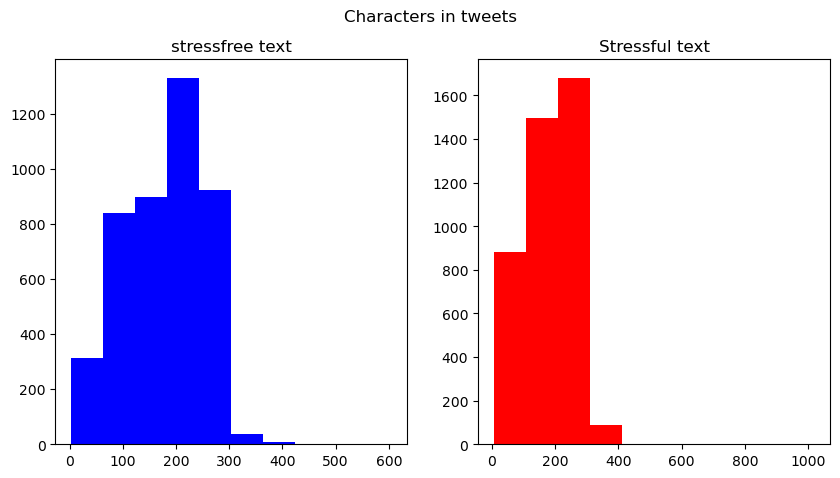

In [35]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=df[df['labels']==1]['text'].str.len()
ax1.hist(tweet_len,color='blue')
ax1.set_title('stressfree text')

tweet_len=df[df['labels']==0]['text'].str.len()
ax2.hist(tweet_len,color='red')
ax2.set_title('Stressful text')
fig.suptitle('Characters in tweets')
plt.show()

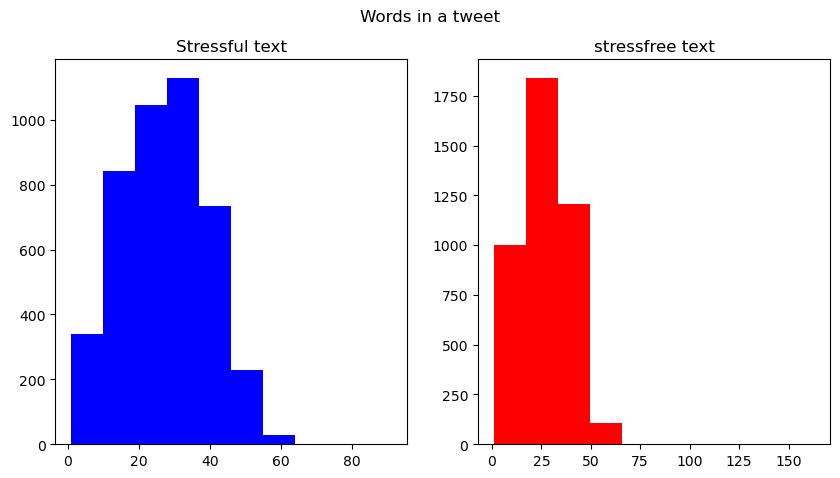

In [36]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len = df[df['labels']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='blue')
ax1.set_title('Stressful text')

tweet_len=df[df['labels']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='red')
ax2.set_title('stressfree text')
fig.suptitle('Words in a tweet')
plt.show()

In [37]:
df = df.drop('hashtags',axis=1)

In [38]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
print("Max index in DataFrame:", df.index.max())
print("DataFrame length:", len(df))

Max index in DataFrame: 8899
DataFrame length: 8516


In [40]:
corpus = []

for index, row in df.iterrows():
    # Extract text and perform operations
    text = re.sub('[^A-Za-z\s]', '', str(row['text']))
    text = text.lower()
    corpus.append(text)

In [41]:
corpus

['being s mom is cleaning  the same shit over and over with the end result with everything being a mess again momlife kids tired',
 'and now we have been given the walkthru book by and to base our whole school pd on grinning face instructionalcoaching excited',
 'wishing you peace joy  love joytrain mentalhealth quote mindfulness goldenhearts iam chooselove iamchoosinglove tuesdaymorning tuesdaythoughts tuesdaymotivation rt ',
 ' speaknoevil monkey can i be honest with you globe showing europeafrica telephone  email cliniccouk therapy help nlp cbt hypnotherapy mentalhealth hertfordshire anxiety stress depression confidence counselling',
 'psy do u hv any regrets me no psy are you happy now me yes i feel relieved   goodbye dr abzarul thank you for your services may god bless and ease your steps exitkkm mentalhealthmatters ',
 ' police car light new product alert police car light silicone suction snapper use code social for  off right arrow sensory spd stim autism adhd anxiety stress men

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [43]:
cv.fit_transform(corpus).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
X = cv.fit_transform(corpus).toarray()

In [45]:
y = df['labels']

In [105]:
print("Shape of X:", X.shape)
print("Shape of Y:", y.shape)

Shape of X: (8516, 24508)
Shape of Y: (8516,)


In [47]:
y.shape

(8516,)

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2, random_state=11)

# Model Training

**1: Logistic Regression**

In [49]:
clf = LogisticRegression()

In [50]:
clf.fit(X_train, y_train)

LogisticRegression()

In [51]:
y_pred = clf.predict(X_test)

In [52]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8356807511737089

In [53]:
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8356807511737089
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       848
           1       0.82      0.87      0.84       856

    accuracy                           0.84      1704
   macro avg       0.84      0.84      0.84      1704
weighted avg       0.84      0.84      0.84      1704



**2: Random forest classifier**

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [55]:
RFC=RandomForestClassifier()

In [56]:
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
predRFC = RFC.predict(X_test)

In [58]:
accuracy_score(y_test,predRFC)

0.8204225352112676

In [59]:
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8356807511737089
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       848
           1       0.82      0.87      0.84       856

    accuracy                           0.84      1704
   macro avg       0.84      0.84      0.84      1704
weighted avg       0.84      0.84      0.84      1704



**3: Decision tree classifier**

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dt = DecisionTreeClassifier()

In [62]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [63]:
preddt = dt.predict(X_test)

In [64]:
accuracy_score(y_test,preddt)

0.795774647887324

In [65]:
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8356807511737089
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       848
           1       0.82      0.87      0.84       856

    accuracy                           0.84      1704
   macro avg       0.84      0.84      0.84      1704
weighted avg       0.84      0.84      0.84      1704



**4: Support vector classifier**

In [66]:
from sklearn.svm import SVC

In [67]:
svc = SVC()

In [68]:
svc.fit(X_train, y_train)

SVC()

In [69]:
pred_svc = svc.predict(X_test)

In [70]:
accuracy_score(y_test,pred_svc)

0.8233568075117371

In [71]:
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8356807511737089
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       848
           1       0.82      0.87      0.84       856

    accuracy                           0.84      1704
   macro avg       0.84      0.84      0.84      1704
weighted avg       0.84      0.84      0.84      1704



**5: MultinomialNB**

In [72]:
from sklearn.naive_bayes import MultinomialNB
clf1 = MultinomialNB()
clf1.fit(X_train,y_train)

MultinomialNB()

In [73]:
# Predicting the Test set results
y_pred = clf1.predict(X_test)

In [74]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[641 207]
 [126 730]]


In [75]:
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8356807511737089
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.79       848
           1       0.78      0.85      0.81       856

    accuracy                           0.80      1704
   macro avg       0.81      0.80      0.80      1704
weighted avg       0.81      0.80      0.80      1704



**6: BernoulliNB**

In [76]:
from sklearn.naive_bayes import BernoulliNB
clf2 = BernoulliNB()
clf2.fit(X_train,y_train)

BernoulliNB()

In [77]:
# Predicting the Test set results
y_pred = clf2.predict(X_test)

In [78]:
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8356807511737089
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       848
           1       0.77      0.87      0.82       856

    accuracy                           0.81      1704
   macro avg       0.81      0.81      0.81      1704
weighted avg       0.81      0.81      0.81      1704



**7: Artificial Neural network**

In [79]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [80]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

In [81]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [82]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10


192/192 [==============================] - 3s 12ms/step - loss: 0.4891 - accuracy: 0.7796 - val_loss: 0.4076 - val_accuracy: 0.8182
Epoch 2/10
192/192 [==============================] - 2s 11ms/step - loss: 0.1944 - accuracy: 0.9245 - val_loss: 0.4082 - val_accuracy: 0.8284
Epoch 3/10
192/192 [==============================] - 3s 14ms/step - loss: 0.0584 - accuracy: 0.9824 - val_loss: 0.5404 - val_accuracy: 0.8240
Epoch 4/10
192/192 [==============================] - 2s 11ms/step - loss: 0.0236 - accuracy: 0.9923 - val_loss: 0.6617 - val_accuracy: 0.8328
Epoch 5/10
192/192 [==============================] - 2s 11ms/step - loss: 0.0104 - accuracy: 0.9974 - val_loss: 0.7179 - val_accuracy: 0.8372
Epoch 6/10
192/192 [==============================] - 2s 10ms/step - loss: 0.0058 - accuracy: 0.9982 - val_loss: 0.7834 - val_accuracy: 0.8314
Epoch 7/10
192/192 [==============================] - 2s 9ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.8408 - val_accuracy: 0.837

In [83]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

54/54 [==============================] - 0s 4ms/step - loss: 0.9887 - accuracy: 0.8169
Test Loss: 0.9886627793312073
Test Accuracy: 0.8169013857841492


In [84]:
classifiers = {
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'Multinomial Naive Bayes': MultinomialNB()
}

In [85]:
# Train and evaluate each classifier
for name, clf in classifiers.items():
    print("Classifier:", name)
    clf.fit(X_train, y_train)
    
    # Predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    error = 1 - accuracy
    
    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("Precision:", precision)
    print("Error:", error)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("="*80)

Classifier: SVC
Accuracy: 0.8233568075117371
Recall: 0.9147196261682243
Precision: 0.7744807121661721
Error: 0.17664319248826288
Confusion Matrix:
[[620 228]
 [ 73 783]]
Classifier: Decision Tree
Accuracy: 0.7922535211267606
Recall: 0.8177570093457944
Precision: 0.779510022271715
Error: 0.20774647887323938
Confusion Matrix:
[[650 198]
 [156 700]]
Classifier: Random Forest
Accuracy: 0.8274647887323944
Recall: 0.9158878504672897
Precision: 0.7793240556660039
Error: 0.17253521126760563
Confusion Matrix:
[[626 222]
 [ 72 784]]
Classifier: Logistic Regression
Accuracy: 0.8356807511737089
Recall: 0.8656542056074766
Precision: 0.8178807947019867
Error: 0.16431924882629112
Confusion Matrix:
[[683 165]
 [115 741]]
Classifier: Bernoulli Naive Bayes
Accuracy: 0.806924882629108
Recall: 0.8726635514018691
Precision: 0.7724922440537746
Error: 0.193075117370892
Confusion Matrix:
[[628 220]
 [109 747]]
Classifier: Multinomial Naive Bayes
Accuracy: 0.8045774647887324
Recall: 0.852803738317757
Precision

In [86]:
#pip install yellowbrick

In [87]:
from yellowbrick.classifier import ClassificationReport

In [88]:
accuracy_scores = {}
f1_scores = {}
recall_scores = {}
precision_scores = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    f1_scores[name] = f1_score(y_test, y_pred)
    recall_scores[name] = recall_score(y_test, y_pred)
    precision_scores[name] = precision_score(y_test, y_pred)

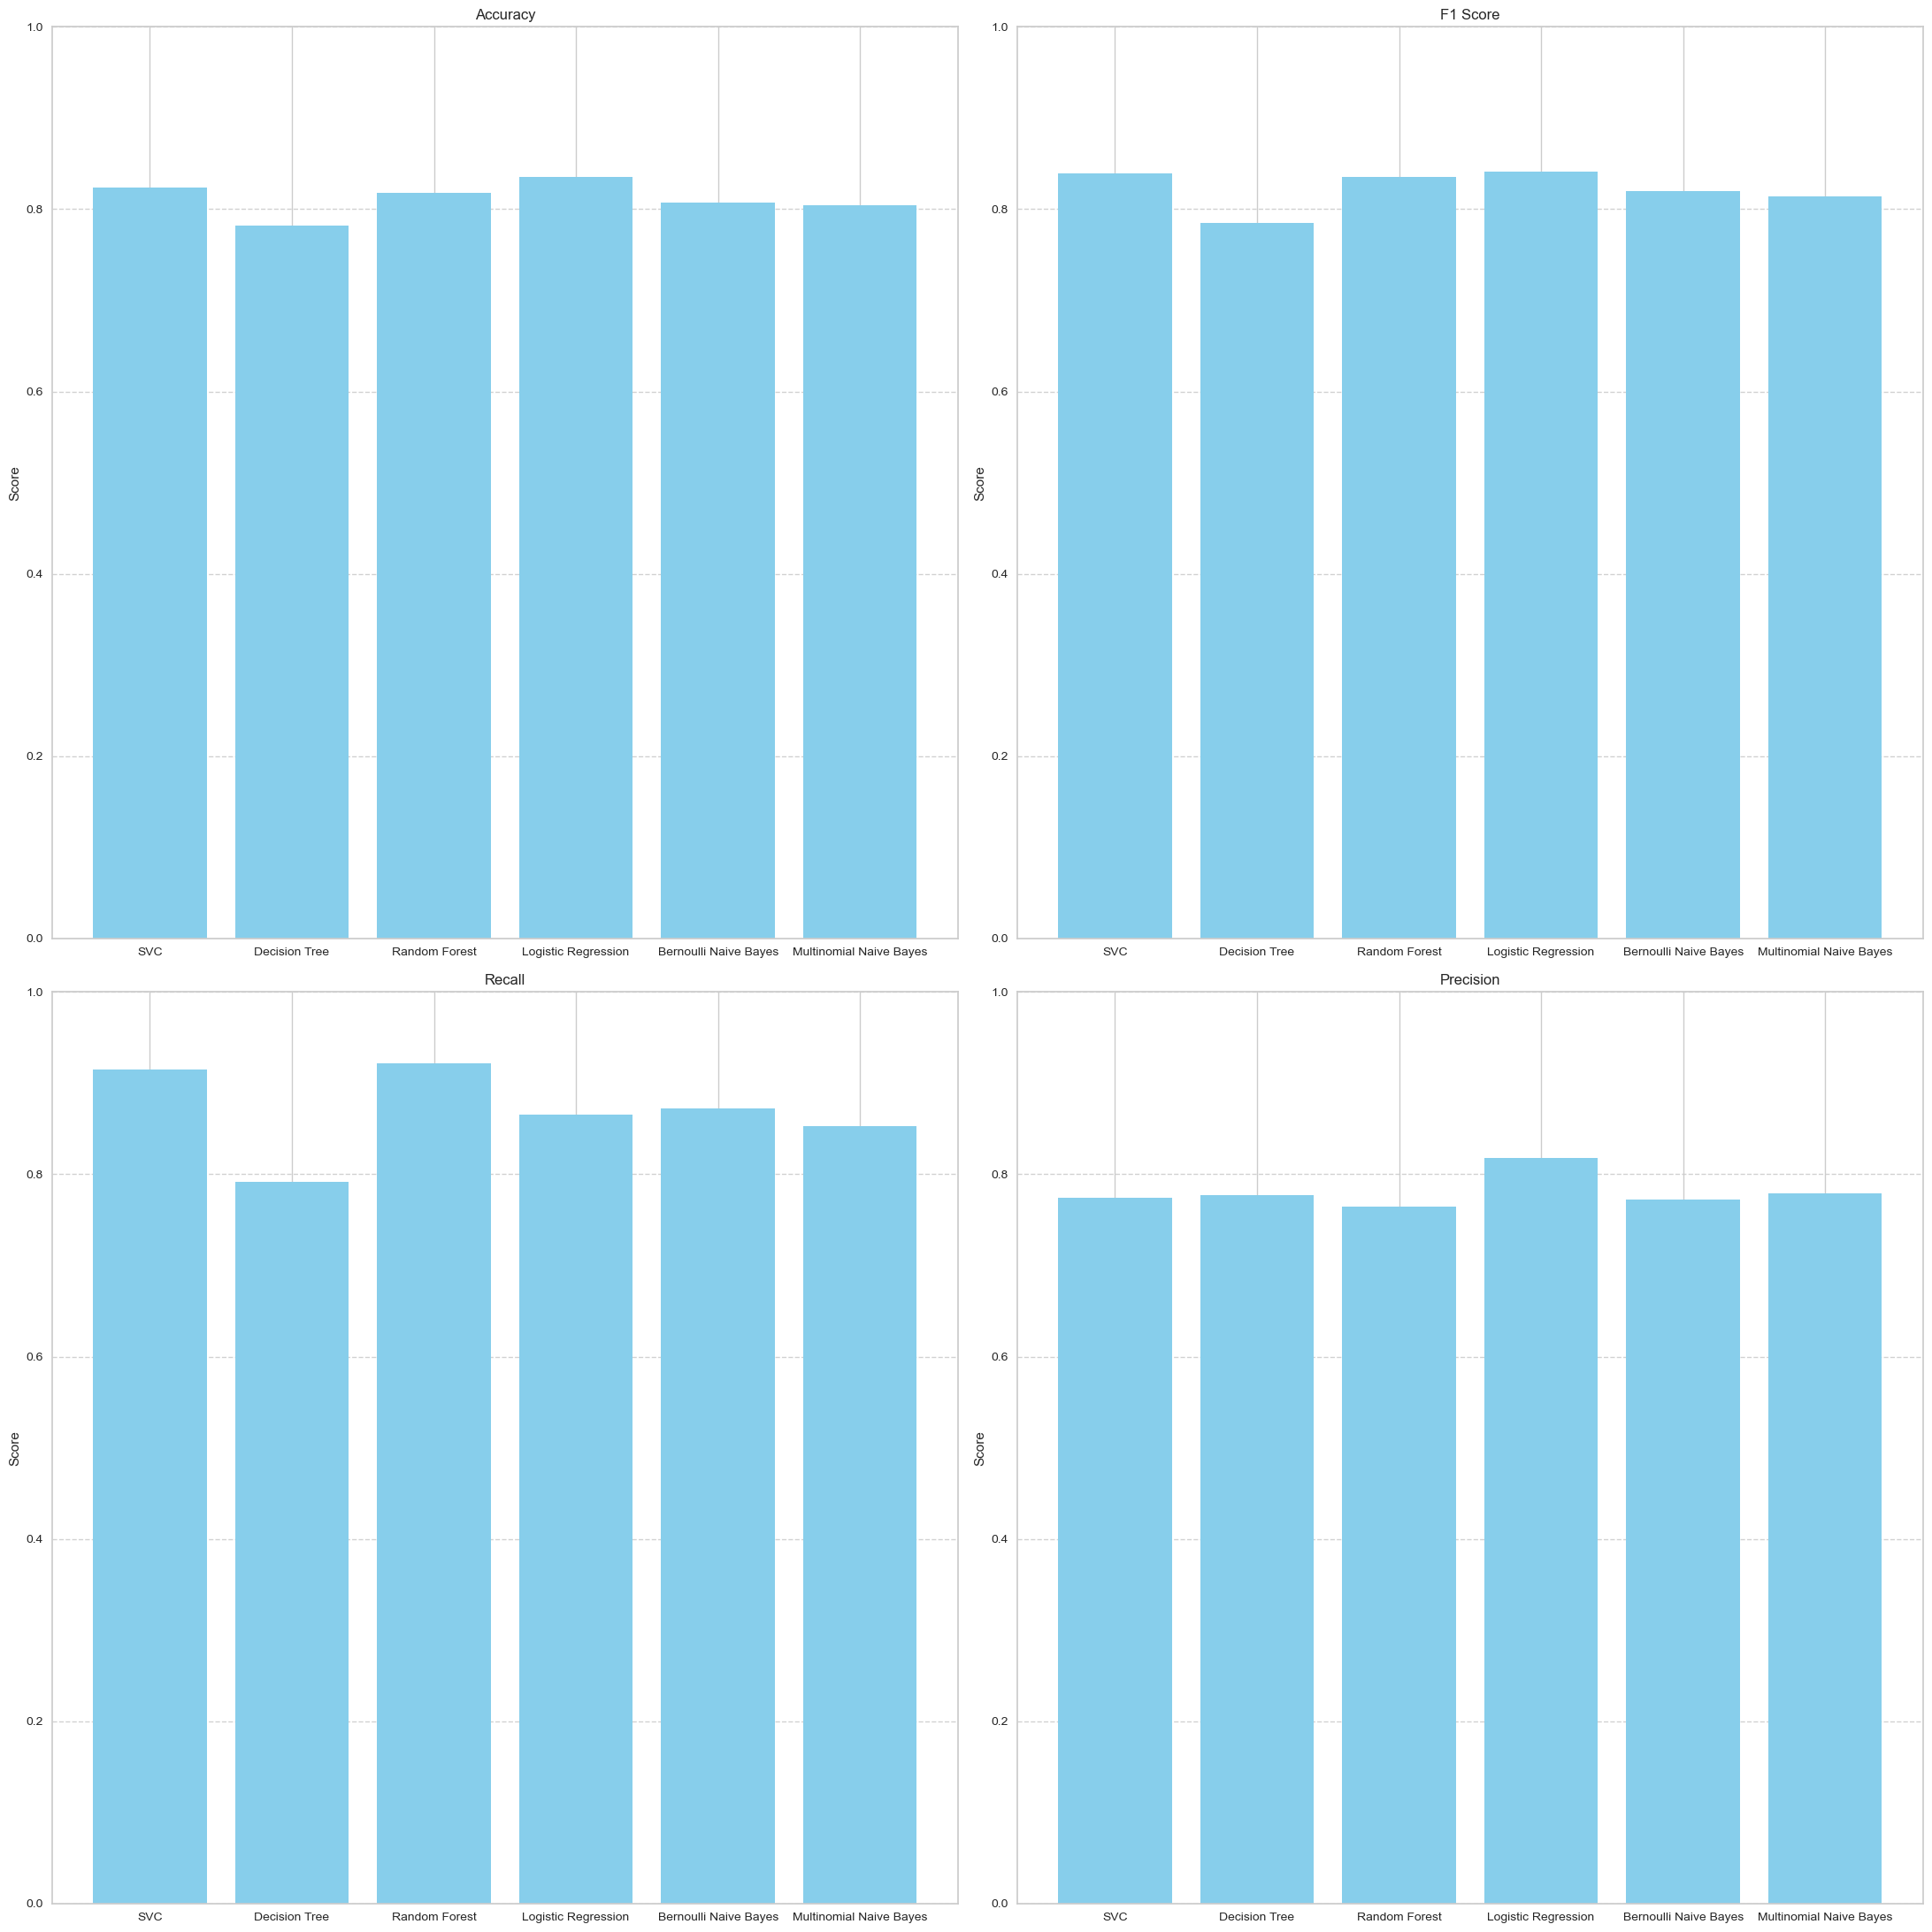

In [89]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(22, 22))

for ax, (metric, scores) in zip(axes.flatten(), [('Accuracy', accuracy_scores), ('F1 Score', f1_scores), ('Recall', recall_scores), ('Precision', precision_scores)]):
    ax.bar(scores.keys(), scores.values(), color='skyblue')
    ax.set_title(metric)
    ax.set_ylabel('Score')
    ax.set_ylim(0, 1)  # Setting y-axis limit between 0 and 1 for better visualization
    ax.grid(axis='y', linestyle='--', alpha=0.9)

plt.tight_layout()
plt.show()

## Testing our model manually 

In [90]:
a = 'very bad'
a_cv = cv.transform([a]).toarray()

In [91]:
clf.predict(a_cv)

array([1], dtype=int64)

In [92]:
b = 'good , i got internship'

In [93]:
b_cv = cv.transform([b]).toarray()

In [94]:
clf.predict(b_cv)

array([0], dtype=int64)

In [95]:
c = 'two girls died in college'

In [96]:
c_cv = cv.transform([c]).toarray()

In [97]:
clf.predict(c_cv)

array([1], dtype=int64)

In [98]:
df['text'][8643]

'I was very good at class & so was Dad face with tears of joy so I got loads of sausage, been for a walk this afternoon did lots of sniffing and said hello to some overseas lorry drivers, off to the doggie Drs soon her name is Dr Biscuit face with tears of joy face with tears of joy dogs dogsoftwitter dogslife happy '

In [99]:
d = 'I was very good at class & so was Dad face with tears of joy so I got loads of sausage, been for a walk this afternoon did lots of sniffing and said hello to some overseas lorry drivers, off to the doggie Drs soon her name is Dr Biscuit face with tears of joy face with tears of joy dogs dogsoftwitter dogslife happy'

In [100]:
d_cv = cv.transform([d]).toarray()

In [101]:
clf.predict(d_cv)

array([0], dtype=int64)

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
from sklearn.neural_network import MLPClassifier

In [104]:
classifiers = {
    'Logistic Regression': (LogisticRegression(max_iter=1000), {'C': [0.1, 1, 10]}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [None, 5, 10, 15]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200]}),
    'Multinomial NB': (MultinomialNB(), {'alpha': [0.1, 1, 10]}),
    'Bernoulli NB': (BernoulliNB(), {'alpha': [0.1, 1, 10]}),
    'ANN': (MLPClassifier(max_iter=1000), {'hidden_layer_sizes': [(50,), (100,), (50, 50)]})
}

# Perform grid search for each classifier
for clf_name, (clf, param_grid) in classifiers.items():
    print(f"Grid search for {clf_name}...")
    grid_search = GridSearchCV(clf, param_grid, cv=5)
    grid_search.fit(X, y)
    
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)
    print()

Grid search for Logistic Regression...
Best Parameters: {'C': 1}
Best Score: 0.8329032031295229

Grid search for Decision Tree...
Best Parameters: {'max_depth': 15}
Best Score: 0.7876946647589589

Grid search for Random Forest...
Best Parameters: {'n_estimators': 50}
Best Score: 0.8159940756301364

Grid search for Multinomial NB...
Best Parameters: {'alpha': 1}
Best Score: 0.8022554784569621

Grid search for Bernoulli NB...
Best Parameters: {'alpha': 1}
Best Score: 0.8044859389257841

Grid search for ANN...
Best Parameters: {'hidden_layer_sizes': (50, 50)}
Best Score: 0.8142329608892345

